In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'Convolutional_Neural_Networks/dataset1/train'
validation_dir = 'Convolutional_Neural_Networks/dataset1/validation'
#train_dir = 'dataset/train'
#alidation_dir = 'dataset/validation'

# Initialising the CNN
model = tf.keras.models.Sequential([
    # Step 1 - Convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    #Pooling Layer
    tf.keras.layers.MaxPooling2D(5, 5),
    # Adding a second convolutional layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    #Pooling Layer
    tf.keras.layers.MaxPooling2D(5,5),
    # Adding a third convolutional layer
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #Pooling Layer
    #tf.keras.layers.MaxPooling2D(2,2),
    #Flattening
    tf.keras.layers.Flatten(),
    #Full connection
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compiling the CNN
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.summary()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
______________________________________

In [2]:
import time
starttrainingtime=time.time()

history = model.fit(
      train_generator,
      steps_per_epoch=100,  
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=2)
trainingtime=time.time()-starttrainingtime

Epoch 1/2
100/100 - 149s - loss: 0.6889 - acc: 0.5295 - val_loss: 0.6802 - val_acc: 0.6030
Epoch 2/2
100/100 - 88s - loss: 0.6752 - acc: 0.5870 - val_loss: 0.6692 - val_acc: 0.5720


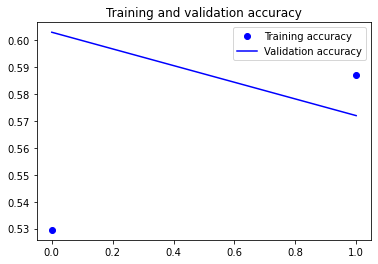

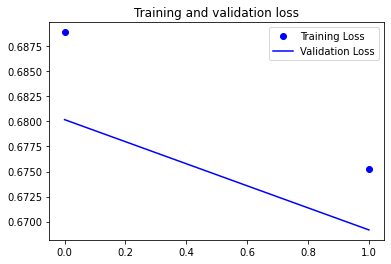

Training time 238.42053937911987
Training accuracy 0.05750000476837158
Evaluation metric 2411705.170960084


In [3]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

print("Training time",trainingtime)
print("Training accuracy",acc[-1]-acc[0])
print("Evaluation metric",(acc[-1]-acc[0])/trainingtime * (10**10))